# 3DFront dataset analysis

In [2]:
DATA_PATH = "/root/desktop/3D-FRONT/3D-FRONT-processed"
dir_names = {
    "prep": "bedrooms_without_lamps", 
    "vert": "bedrooms_without_lamps_full_labels_vertices", 
    "norm": "bedrooms_without_lamps_full/labels", 
    "cam": "bedrooms_without_lamps_full_labels", 
    "cam_fixed_dist": "bedrooms_without_lamps_full_labels_fixed_dist",
    "raw": "bedrooms_without_lamps_full_raw/raw_256",
    "raw_depth": "bedrooms_without_lamps_full_raw/raw_256_depth",
    "raw_depth_normal": "bedrooms_without_lamps_full_raw/raw_256_depth_normal",
    "raw_depth_normal_trans": "bedrooms_without_lamps_full_raw/raw_256_depth_normal_trans",
    "img": "bedrooms_without_lamps_full_images/images_256",
    "img_depth": "bedrooms_without_lamps_full_images/images_256_depth",
    "img_depth_normal": "bedrooms_without_lamps_full_images/images_256_depth_normal",
    "img_depth_normal_trans": "bedrooms_without_lamps_full_images/images_256_depth_normal_trans",
    "img_fixed_dist": "bedrooms_without_lamps_full_images_fixed_dist/images_256", 
    "depth_fixed_dist": "bedrooms_without_lamps_full_images_fixed_dist/depths_256"
}

In [3]:
import os

data_nums = {
    "prep": 0, 
    "vert": 0, 
    "norm": 0, 
    "cam": 0, 
    "cam_fixed_dist": 0,
    "raw": 0,
    "raw_depth": 0,
    "raw_depth_normal": 0,
    "raw_depth_normal_trans": 0,
    "img": 0,
    "img_depth": 0,
    "img_depth_normal": 0,
    "img_depth_normal_trans": 0,
    "img_fixed_dist": 0, 
    "depth_fixed_dist": 0,
}

for id, dir_name in dir_names.items():
    data_nums[id] = len(os.listdir(os.path.join(DATA_PATH, dir_name)))
    print(f"ID: {id}    # of data: {data_nums[id]}")


ID: prep    # of data: 4042
ID: vert    # of data: 3695
ID: norm    # of data: 3695
ID: cam    # of data: 3695


FileNotFoundError: [Errno 2] No such file or directory: '/root/desktop/3D-FRONT/3D-FRONT-processed/bedrooms_without_lamps_full_labels_fixed_dist'

In [4]:
EX_SCENE_ID = "00110bde-f580-40be-b8bb-88715b338a2a_Bedroom-43072"
data_ex_paths = {
    "prep": 0, 
    "vert": 0, 
    "norm": 0, 
    "cam": 0, 
    "raw": 0,
    "raw_depth": 0,
    "img": 0,
    "img_depth": 0,
}

for id, dir_name in dir_names.items():
    data_path = os.path.join(DATA_PATH, dir_name)
    ex_scene_path = os.path.join(data_path, EX_SCENE_ID)
    data_ex_paths[id] = ex_scene_path
    print("[ID]", id)
    print(os.listdir(data_ex_paths[id]))

[ID] prep
['rendered_scene_256.png', 'room_mask.png', 'boxes.npz']
[ID] vert
['boxes.npz']
[ID] norm
['boxes.npz']
[ID] cam
['boxes.npz']
[ID] cam_fixed_dist


FileNotFoundError: [Errno 2] No such file or directory: '/root/desktop/3D-FRONT/3D-FRONT-processed/bedrooms_without_lamps_full_labels_fixed_dist/00110bde-f580-40be-b8bb-88715b338a2a_Bedroom-43072'

In [5]:
import numpy as np

data_examples = {
    "vert": 0, 
    "norm": 0, 
    "cam": 0
}

for id, data_ex_path in data_ex_paths.items():
    if id in data_examples.keys():
        data_examples[id] = np.load(os.path.join(data_ex_path, "boxes.npz"), allow_pickle=True)
        print("[ID]", id)
        for k in data_examples[id].keys():
            print("-KEY:", k)
            print("-VALUE", "\n", data_examples[id][k])
        print()

[ID] vert
-KEY: class_labels
-VALUE 
 [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
-KEY: translations
-VALUE 
 [[ 0.10784449  1.2654     -1.433348  ]
 [ 0.4418635   0.4721165   0.2150081 ]
 [ 0.00342086  0.267469    1.5303891 ]
 [-1.2513775   0.5602977   0.452     ]
 [ 1.3946801   0.25008625 -0.7359673 ]]
-KEY: sizes
-VALUE 
 [[1.35126    1.2654     0.242706  ]
 [1.043791   0.4721165  1.048441  ]
 [0.157859   0.267469   0.21241   ]
 [0.343923   0.56033224 0.253039  ]
 [0.238492   0.24997775 0.196098  ]]
-KEY: angles
-VALUE 
 [[ 0.       ]
 [-1.5707872]
 [ 0.       ]
 [ 1.5707872]
 [-1.5707872]]
-KEY: room_layout
-VALUE 
 [[[0]
  [0]
  [0]
  ...
  [0]
  [0]
  [0]]

 [[0]
  [0]
  [0]
  ...
  [0]
  [0]
  [0]

In [8]:
!pip install h5py

In [15]:
import h5py

# Check hdf5 file
idx = 0
hdf_ex_path = os.path.join(DATA_PATH, dir_names["raw_depth"], EX_SCENE_ID, f"{idx}.hdf5")

with h5py.File(hdf_ex_path, "r") as hdf:
    # List all groups
    print("Keys:", list(hdf.keys()))

Keys: ['blender_proc_version', 'colors', 'depth']


In [18]:
from PIL import Image
import matplotlib.pyplot as plt

EX_SCENE_ID = "00110bde-f580-40be-b8bb-88715b338a2a_Bedroom-43072" # "bbed00a6-d2e0-4f55-a5cc-09db9e3dd6cd_SecondBedroom-45688"

# Check rendered image
idx = 0
img_types = ["colors", "normals", "depth"]
img_ex_paths = {k: 0 for k in img_types}
for img_type in img_types:
    img_ex_paths[img_type] = os.path.join(DATA_PATH, dir_names["img"], EX_SCENE_ID, str(idx).zfill(4) + f"_{img_type}" + ".png")

img_ex_colors = Image.open(img_ex_paths["colors"])
img_ex_colors_arr = np.array(img_ex_colors)

print("Array shape:", img_ex_colors_arr.shape)
print("Data type:", img_ex_colors_arr.dtype)
rgb_ex_arr = img_ex_colors_arr[:, :, :3]
alpha_ex_arr = img_ex_colors_arr[:, :, 3:]

print(np.sum(alpha_ex_arr != 255))

FileNotFoundError: [Errno 2] No such file or directory: '/root/desktop/3D-FRONT/3D-FRONT-processed/bedrooms_without_lamps_full_images/images_256/00110bde-f580-40be-b8bb-88715b338a2a_Bedroom-43072/0000_colors.png'

In [10]:
from PIL import Image
import matplotlib.pyplot as plt

EX_SCENE_ID = "00110bde-f580-40be-b8bb-88715b338a2a_Bedroom-43072" # "bbed00a6-d2e0-4f55-a5cc-09db9e3dd6cd_SecondBedroom-45688"

# Check rendered image
idx = 0
img_types = ["colors", "depth"]
img_ex_paths = {k: 0 for k in img_types}
for img_type in img_types:
    if img_type == "colors":
        img_ex_paths[img_type] = os.path.join(DATA_PATH, dir_names["img_fixed_dist"], EX_SCENE_ID, str(idx).zfill(4) + ".png")
    elif img_type == "depth":
        img_ex_paths[img_type] = os.path.join(DATA_PATH, dir_names["depth_fixed_dist"], EX_SCENE_ID, str(idx).zfill(4) + ".png")

img_ex_colors = Image.open(img_ex_paths["colors"])
img_ex_colors_arr = np.array(img_ex_colors)

print("Array shape:", img_ex_colors_arr.shape)
print("Data type:", img_ex_colors_arr.dtype)
rgb_ex_arr = img_ex_colors_arr[:, :, :3]
alpha_ex_arr = img_ex_colors_arr[:, :, 3:]

print(np.sum(alpha_ex_arr != 255))

Array shape: (256, 256, 4)
Data type: uint8
0


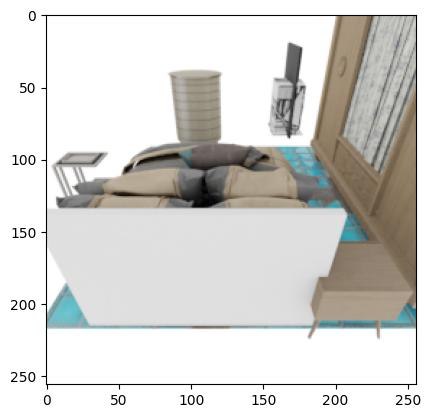

In [11]:
plt.imshow(rgb_ex_arr)

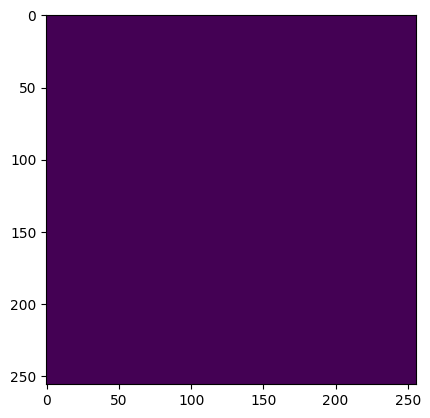

In [12]:
alpha_mask = alpha_ex_arr.astype(np.float32) / 255.0
plt.imshow(alpha_mask)

In [13]:
from PIL import Image
import matplotlib.pyplot as plt

EX_SCENE_ID = "00110bde-f580-40be-b8bb-88715b338a2a_Bedroom-43072" # "bbed00a6-d2e0-4f55-a5cc-09db9e3dd6cd_SecondBedroom-45688"

# Check rendered image
idx = 0
img_types = ["colors", "normals", "depth"]
img_ex_paths = {k: 0 for k in img_types}
for img_type in img_types:
    if img_type == "colors":
        img_ex_paths[img_type] = os.path.join(DATA_PATH, dir_names["img_fixed_dist"], EX_SCENE_ID, str(idx).zfill(4) + ".png")
    elif img_type == "depth":
        img_ex_paths[img_type] = os.path.join(DATA_PATH, dir_names["depth_fixed_dist"], EX_SCENE_ID, str(idx).zfill(4) + ".png")

# img_ex_normals = Image.open(img_ex_paths["normals"])
# img_ex_normals_arr = np.array(img_ex_normals)
img_ex_depth = Image.open(img_ex_paths["depth"])
img_ex_depth_arr = np.array(img_ex_depth)

# print("[Array shape]", "Normals:", img_ex_normals_arr.shape, "Depth:", img_ex_depth_arr.shape)
# print("[Data type]", img_ex_normals_arr.dtype, img_ex_depth_arr.dtype)

# normal_ex_arr = img_ex_normals_arr[:, :, :3]
# alpha_ex_arr = img_ex_normals_arr[:, :, 3:]
# print("normal image:", normal_ex_arr.shape)

depth_ex_arr = img_ex_depth_arr[:, :, 0]
print(np.all(img_ex_depth_arr[:, :, 0] == img_ex_depth_arr[:, :, 1]))
print("depth image:", depth_ex_arr.shape)

False
depth image: (256, 256)


In [14]:
from PIL import Image
import matplotlib.pyplot as plt

EX_SCENE_ID = "00110bde-f580-40be-b8bb-88715b338a2a_Bedroom-43072" # "bbed00a6-d2e0-4f55-a5cc-09db9e3dd6cd_SecondBedroom-45688"

img_ex_depth = Image.open(img_ex_paths["depth"])
img_ex_depth_arr = np.array(img_ex_depth)

print("[Array shape]", "Depth:", img_ex_depth_arr.shape)
print("[Data type]", img_ex_depth_arr.dtype)

depth_ex_arr = img_ex_depth_arr[:, :, 0]
print(np.all(img_ex_depth_arr[:, :, 0] == img_ex_depth_arr[:, :, 1]))
print("depth image:", depth_ex_arr.shape)

[Array shape] Depth: (256, 256, 4)
[Data type] uint8
False
depth image: (256, 256)


In [15]:
plt.imshow(normal_ex_arr)

NameError: name 'normal_ex_arr' is not defined

255 0
0


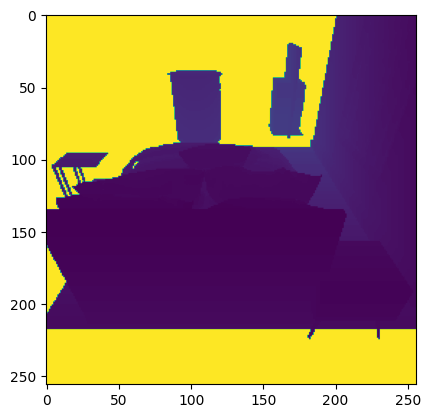

In [43]:
# Anti-aliased misses thin structures
print(np.max(depth_ex_arr), np.min(depth_ex_arr))
print(depth_ex_arr[150][0])
plt.imshow(depth_ex_arr, cmap="viridis")
plt.show()

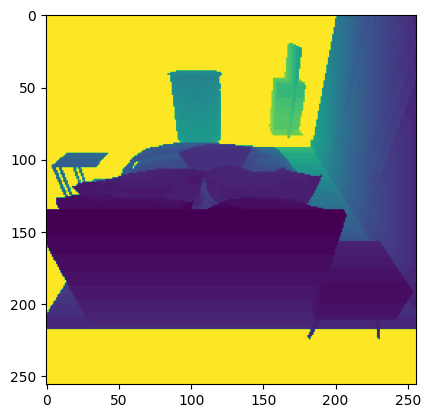

In [17]:
depth_ex_arr_clip = np.clip(depth_ex_arr, 0, 60)
plt.imshow(depth_ex_arr_clip, cmap="viridis")
plt.show()

65280


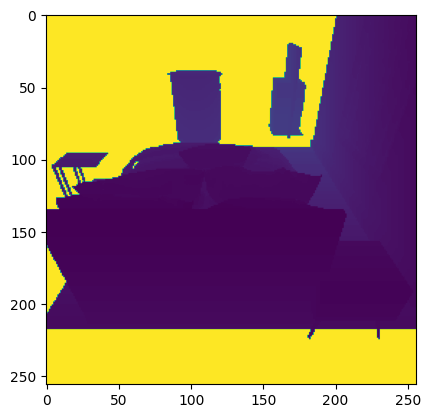

In [18]:
# (0, 65535) value depth image
depth_ex_arr_scaled = (depth_ex_arr.astype(np.uint32) * 256).astype(np.uint32)
print(np.max(depth_ex_arr_scaled))
plt.imshow(depth_ex_arr_scaled, cmap="viridis")
plt.show()

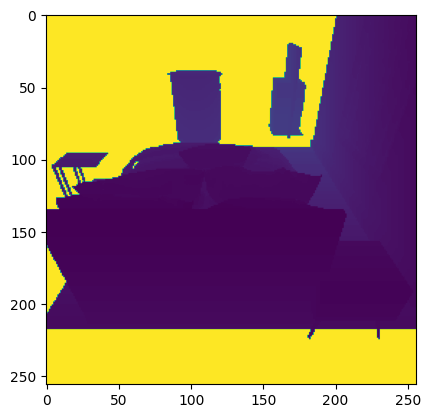

In [19]:
depth_ex_arr_norm = (depth_ex_arr - np.min(depth_ex_arr)) / (np.max(depth_ex_arr) - np.min(depth_ex_arr))
plt.imshow(depth_ex_arr_norm, cmap="viridis")
plt.show()

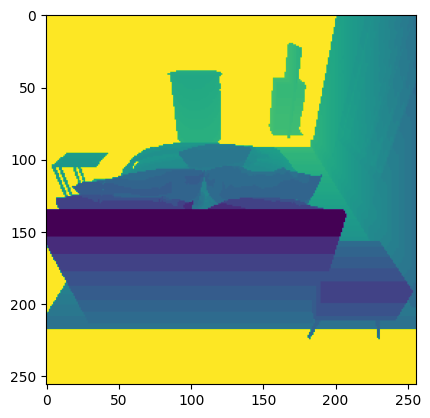

In [20]:
depth_ex_arr_log = np.log1p(depth_ex_arr)
depth_ex_arr_norm = (depth_ex_arr_log - np.min(depth_ex_arr_log)) / (np.max(depth_ex_arr_log) - np.min(depth_ex_arr_log))
plt.imshow(depth_ex_arr_norm, cmap="viridis")
plt.show()

In [21]:
from PIL import Image
import matplotlib.pyplot as plt

EX_SCENE_ID = "00110bde-f580-40be-b8bb-88715b338a2a_Bedroom-43072" # "bbed00a6-d2e0-4f55-a5cc-09db9e3dd6cd_SecondBedroom-45688"

# Check rendered image
idx = 0
img_types = ["colors", "normals", "depth"]
img_ex_paths = {k: 0 for k in img_types}
for img_type in img_types:
    img_ex_paths[img_type] = os.path.join(DATA_PATH, dir_names["img_depth_normal_trans"], EX_SCENE_ID, str(idx).zfill(4) + f"_{img_type}" + ".png")

img_ex_colors = Image.open(img_ex_paths["colors"])
img_ex_colors_arr = np.array(img_ex_colors)

print("Array shape:", img_ex_colors_arr.shape)
print("Data type:", img_ex_colors_arr.dtype)
rgb_ex_arr = img_ex_colors_arr[:, :, :3]
alpha_ex_arr = img_ex_colors_arr[:, :, 3:]

print(np.sum(alpha_ex_arr != 255))

Array shape: (256, 256, 4)
Data type: uint8
0


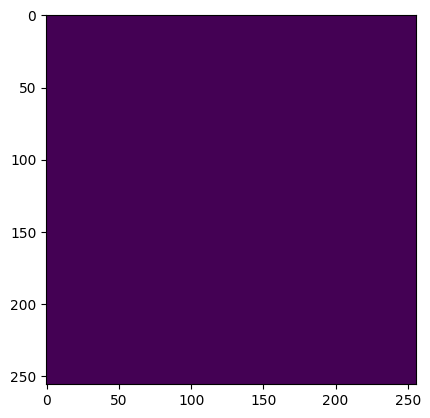

In [22]:
alpha_mask = alpha_ex_arr.astype(np.float32) / 255.0
plt.imshow(alpha_mask)

In [44]:
# Check depth
import h5py

# Check hdf5 file
idx = 0
hdf_ex_path = os.path.join(DATA_PATH, dir_names["raw_depth"], EX_SCENE_ID, f"{idx}.hdf5")

with h5py.File(hdf_ex_path, "r") as hdf:
    # List all groups
    print("Keys:", list(hdf.keys()))

from PIL import Image
import matplotlib.pyplot as plt

EX_SCENE_ID = "00110bde-f580-40be-b8bb-88715b338a2a_Bedroom-43072" # "bbed00a6-d2e0-4f55-a5cc-09db9e3dd6cd_SecondBedroom-45688"

# Check rendered image
idx = 0
img_ex_path = os.path.join(DATA_PATH, dir_names["img_fixed_dist"], EX_SCENE_ID, str(idx).zfill(4) + ".png")

img_ex = Image.open(img_ex_path)
img_ex_arr = np.array(img_ex)

print("Array shape:", img_ex_arr.shape)
print("Data type:", img_ex_arr.dtype)
rgb_ex_arr = img_ex_arr[:, :, :3]
alpha_ex_arr = img_ex_arr[:, :, 3:]

print(np.sum(alpha_ex_arr != 255))

Keys: ['blender_proc_version', 'colors', 'depth']
Array shape: (256, 256, 4)
Data type: uint8
0


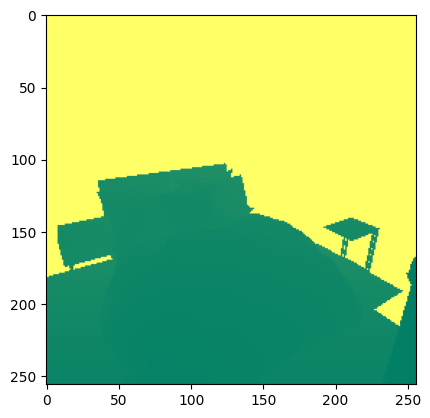

In [24]:
plt.imshow(rgb_ex_arr)

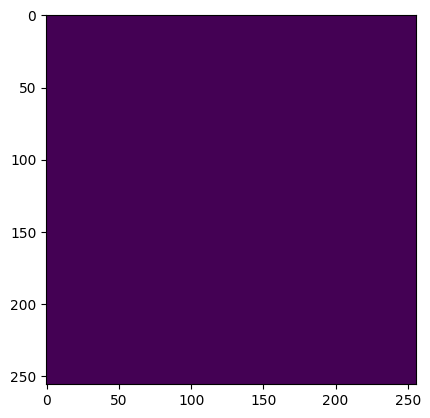

In [25]:
alpha_mask = alpha_ex_arr.astype(np.float32) / 255.0
plt.imshow(alpha_mask)

In [26]:
import os

EX_SCENE_ID = "00110bde-f580-40be-b8bb-88715b338a2a_Bedroom-43072"
render_path = os.path.join(DATA_PATH, dir_names["img_fixed_dist"], EX_SCENE_ID)
depth_path = os.path.join(DATA_PATH, dir_names["depth_fixed_dist"], EX_SCENE_ID)
camera_path = os.path.join(DATA_PATH, dir_names["cam_fixed_dist"], EX_SCENE_ID)

print("[Render path]")
for filename in os.listdir(render_path):
    print(filename)
print("[Depth path]")
for filename in os.listdir(depth_path):
    print(filename)
print("[Camera path]")
for filename in os.listdir(camera_path):
    print(filename)

[Render path]
0009.png
0033.png
0023.png
0011.png
0006.png
0019.png
0021.png
0026.png
0035.png
0014.png
0003.png
0038.png
0018.png
0027.png
0000.png
0016.png
0008.png
0028.png
0010.png
0037.png
0007.png
0020.png
0015.png
0005.png
0039.png
0002.png
0013.png
0024.png
0030.png
0017.png
0036.png
0029.png
0034.png
0001.png
0032.png
0031.png
0022.png
0012.png
0004.png
0025.png
[Depth path]
0009.png
0033.png
0023.png
0011.png
0006.png
0019.png
0021.png
0026.png
0035.png
0014.png
0003.png
0038.png
0018.png
0027.png
0000.png
0016.png
0008.png
0028.png
0010.png
0037.png
0007.png
0020.png
0015.png
0005.png
0039.png
0002.png
0013.png
0024.png
0030.png
0017.png
0036.png
0029.png
0034.png
0001.png
0032.png
0031.png
0022.png
0012.png
0004.png
0025.png
[Camera path]
boxes.npz


In [27]:
import numpy as np

camera = np.load(os.path.join(camera_path, "boxes.npz"), allow_pickle=True)
for k in camera.keys():
    print(k)

uids
jids
scene_id
scene_uid
scene_type
json_path
room_layout
floor_plan_vertices
floor_plan_faces
floor_plan_centroid
class_labels
translations
sizes
angles
camera_coords
target_coords


In [28]:
print(camera["floor_plan_centroid"])

[2.32855 0.      1.0122 ]


In [29]:
forward_vec = camera["target_coords"] - camera["camera_coords"]
print("[Camera coords]")
print(camera["camera_coords"])
print("[Target coords]")
print(camera["target_coords"])
print("[Forward vector]")
print(forward_vec)

[Camera coords]
[[ 2.47184134e+00  1.70000005e+00  0.00000000e+00]
 [ 2.44140887e+00  1.70000005e+00  3.86681199e-01]
 [ 2.35086083e+00  1.70000005e+00  7.63840973e-01]
 [ 2.20242667e+00  1.70000005e+00  1.12219250e+00]
 [ 1.99976170e+00  1.70000005e+00  1.45291185e+00]
 [ 1.74785578e+00  1.70000005e+00  1.74785590e+00]
 [ 1.45291185e+00  1.70000005e+00  1.99976182e+00]
 [ 1.12219262e+00  1.70000005e+00  2.20242667e+00]
 [ 7.63840914e-01  1.70000005e+00  2.35086083e+00]
 [ 3.86680961e-01  1.70000005e+00  2.44140887e+00]
 [-1.08047615e-07  1.70000005e+00  2.47184134e+00]
 [-3.86681169e-01  1.70000005e+00  2.44140887e+00]
 [-7.63841093e-01  1.70000005e+00  2.35086083e+00]
 [-1.12219262e+00  1.70000005e+00  2.20242667e+00]
 [-1.45291185e+00  1.70000005e+00  1.99976182e+00]
 [-1.74785578e+00  1.70000005e+00  1.74785590e+00]
 [-1.99976182e+00  1.70000005e+00  1.45291185e+00]
 [-2.20242691e+00  1.70000005e+00  1.12219214e+00]
 [-2.35086107e+00  1.70000005e+00  7.63840497e-01]
 [-2.44140887e+

In [30]:
# !pip install mathutils
# !pip install https://github.com/majimboo/py-mathutils/archive/2.78a.zip

In [31]:
# from typing import Union, Optional
# from mathutils import Matrix, Vector, Euler
import numpy as np

# From ATISS CameraUtility.py
def rotation_from_forward_vec(forward, up=np.array([0, 1, 0])) -> np.ndarray:
    # Normalize the forward vector
    forward = forward / np.linalg.norm(forward)

    # Ensure the up vector is not collinear with the forward vector
    if np.allclose(forward, up) or np.allclose(forward, -up):
        up = np.array([1, 0, 0]) # Use an alternative default up vector

    # Compute the right vector
    right = np.cross(forward, up)
    right = right / np.linalg.norm(right)

    # Recompute the up vector to ensure orthogonality
    up = np.cross(right, forward)

    return right, up, forward
    # # Assemble the rotation matrix
    # rotation_matrix = np.array([right, up, forward])
    # return rotation_matrix.T


# rotation_matrix = rotation_from_forward_vec(forward_vec)
# cam2world_matrix = build_transformation_mat(camera["camera_coords"], rotation_matrix)

right_vec, up_vec, forward_vec = rotation_from_forward_vec(forward_vec)

print("Right vector:", right_vec)
print("Up vector:", up_vec)
print("Forward vector:", forward_vec)

Right vector: [[-0.00000000e+00  0.00000000e+00 -1.58113884e-01]
 [ 2.47344623e-02  0.00000000e+00 -1.56167241e-01]
 [ 4.88598774e-02  0.00000000e+00 -1.50375237e-01]
 [ 7.17821998e-02  0.00000000e+00 -1.40880490e-01]
 [ 9.29370072e-02  0.00000000e+00 -1.27916824e-01]
 [ 1.11803404e-01  0.00000000e+00 -1.11803395e-01]
 [ 1.27916824e-01  0.00000000e+00 -9.29370072e-02]
 [ 1.40880490e-01  0.00000000e+00 -7.17822089e-02]
 [ 1.50375237e-01  0.00000000e+00 -4.88598729e-02]
 [ 1.56167241e-01  0.00000000e+00 -2.47344465e-02]
 [ 1.58113884e-01 -0.00000000e+00  6.91137734e-09]
 [ 1.56167241e-01 -0.00000000e+00  2.47344600e-02]
 [ 1.50375237e-01 -0.00000000e+00  4.88598820e-02]
 [ 1.40880490e-01 -0.00000000e+00  7.17822089e-02]
 [ 1.27916824e-01 -0.00000000e+00  9.29370072e-02]
 [ 1.11803404e-01 -0.00000000e+00  1.11803395e-01]
 [ 9.29370072e-02 -0.00000000e+00  1.27916824e-01]
 [ 7.17821772e-02 -0.00000000e+00  1.40880508e-01]
 [ 4.88598458e-02 -0.00000000e+00  1.50375255e-01]
 [ 2.47344578e-02

In [32]:
import itertools
import json
import zipfile
from abc import ABC, abstractmethod
from dataclasses import dataclass
from typing import Dict, List, Tuple, BinaryIO, Union, Optional

import numpy as np
from PIL import Image

# # From ATISS CameraUtility.py
# def rotation_from_forward_vec(forward, up=np.array([0, 1, 0])) -> np.ndarray:
#     # Normalize the forward vector
#     forward = forward / np.linalg.norm(forward)

#     # Ensure the up vector is not collinear with the forward vector
#     if np.allclose(forward, up) or np.allclose(forward, -up):
#         up = np.array([1, 0, 0]) # Use an alternative default up vector

#     # Compute the right vector
#     right = np.cross(forward, up)
#     right = right / np.linalg.norm(right)

#     # Recompute the up vector to ensure orthogonality
#     up = np.cross(right, forward)

#     return right, up, forward
#     # # Assemble the rotation matrix
#     # rotation_matrix = np.array([right, up, forward])
#     # return rotation_matrix.T

def rotation_from_forward_vec(forward_vec: Union[np.ndarray, list], up_axis: str = 'Y',
                              inplane_rot: Optional[float] = None) -> np.ndarray:
    """ Returns a camera rotation matrix for the given forward vector and up axis using NumPy

    :param forward_vec: The forward vector which specifies the direction the camera should look.
    :param up_axis: The up axis, usually Y.
    :param inplane_rot: The in-plane rotation in radians. If None is given, the in-plane rotation is determined only
                        based on the up vector.
    :return: The corresponding rotation matrix.
    """
    # Normalize the forward vector
    forward_vec = np.array(forward_vec, dtype=np.float64)
    forward_vec /= np.linalg.norm(forward_vec)

    # Define the up vector
    if up_axis.upper() == 'Y':
        up_vec = np.array([0.0, 1.0, 0.0])
    elif up_axis.upper() == 'Z':
        up_vec = np.array([0.0, 0.0, 1.0])
    elif up_axis.upper() == 'X':
        up_vec = np.array([1.0, 0.0, 0.0])
    else:
        raise ValueError("Invalid up_axis. Choose from 'X', 'Y', or 'Z'.")

    # Handle edge cases where forward_vec and up_vec are collinear
    # _dot = np.dot(forward_vec, up_vec)
    # _abs = np.abs(_dot)
    # _close = np.isclose(_abs, 1.0)
    # print(_close)
    # _any = np.any(_close)
    # print(_any)
    # print("======================")
    if np.allclose(np.abs(np.dot(forward_vec, up_vec)), 1.0):
        up_vec = np.array([1.0, 0.0, 0.0]) if up_axis.upper() != 'X' else np.array([0.0, 1.0, 0.0])

    # Compute the right vector (cross product of forward and up)
    right_vec = np.cross(up_vec, forward_vec)
    right_vec /= np.linalg.norm(right_vec)

    # Recompute the true up vector (orthogonal to forward and right)
    up_vec = np.cross(forward_vec, right_vec)

    # Construct the rotation matrix (columns represent right, up, forward)
    rotation_matrix = np.stack((right_vec, up_vec, -forward_vec), axis=1)

    # Apply in-plane rotation if specified
    if inplane_rot is not None:
        inplane_rotation = np.array([
            [np.cos(inplane_rot), -np.sin(inplane_rot), 0],
            [np.sin(inplane_rot),  np.cos(inplane_rot), 0],
            [0,                   0,                   1]
        ])
        rotation_matrix = rotation_matrix @ inplane_rotation

    return rotation_matrix

@dataclass
class Camera(ABC):
    """
    An object describing how a camera corresponds to pixels in an image.
    """

    @abstractmethod
    def image_coords(self) -> np.ndarray:
        """
        :return: ([self.height, self.width, 2]).reshape(self.height * self.width, 2) image coordinates
        """

    @abstractmethod
    def camera_rays(self, coords: np.ndarray) -> np.ndarray:
        """
        For every (x, y) coordinate in a rendered image, compute the ray of the
        corresponding pixel.

        :param coords: an [N x 2] integer array of 2D image coordinates.
        :return: an [N x 2 x 3] array of [2 x 3] (origin, direction) tuples.
                 The direction should always be unit length.
        """

    def depth_directions(self, coords: np.ndarray) -> np.ndarray:
        """
        For every (x, y) coordinate in a rendered image, get the direction that
        corresponds to "depth" in an RGBD rendering.

        This may raise an exception if there is no "D" channel in the
        corresponding ViewData.

        :param coords: an [N x 2] integer array of 2D image coordinates.
        :return: an [N x 3] array of normalized depth directions.
        """
        _ = coords
        raise NotImplementedError

    @abstractmethod
    def center_crop(self) -> "Camera":
        """
        Creates a new camera with the same intrinsics and direction as this one,
        but with a center crop to a square of the smaller dimension.
        """

    @abstractmethod
    def resize_image(self, width: int, height: int) -> "Camera":
        """
        Creates a new camera with the same intrinsics and direction as this one,
        but with resized image dimensions.
        """

    @abstractmethod
    def scale_scene(self, factor: float) -> "Camera":
        """
        Creates a new camera with the same intrinsics and direction as this one,
        but with the scene rescaled by the given factor.
        """


@dataclass
class ProjectiveCamera(Camera):
    """
    A Camera implementation for a standard pinhole camera.

    The camera rays shoot away from the origin in the z direction, with the x
    and y directions corresponding to the positive horizontal and vertical axes
    in image space.
    """

    origin: np.ndarray
    x: np.ndarray
    y: np.ndarray
    z: np.ndarray
    width: int
    height: int
    x_fov: float
    y_fov: float

    def image_coords(self) -> np.ndarray:
        ind = np.arange(self.width * self.height)
        coords = np.stack([ind % self.width, ind // self.width], axis=1).astype(np.float32)
        return coords

    def camera_rays(self, coords: np.ndarray) -> np.ndarray:
        fracs = (coords / (np.array([self.width, self.height], dtype=np.float32) - 1)) * 2 - 1
        fracs = fracs * np.tan(np.array([self.x_fov, self.y_fov]) / 2)
        directions = self.z + self.x * fracs[:, :1] + self.y * fracs[:, 1:]
        directions = directions / np.linalg.norm(directions, axis=-1, keepdims=True)
        return np.stack([np.broadcast_to(self.origin, directions.shape), directions], axis=1)

    def depth_directions(self, coords: np.ndarray) -> np.ndarray:
        return np.tile((self.z / np.linalg.norm(self.z))[None], [len(coords), 1])

    def resize_image(self, width: int, height: int) -> "ProjectiveCamera":
        """
        Creates a new camera for the resized view assuming the aspect ratio does not change.
        """
        assert width * self.height == height * self.width, "The aspect ratio should not change."
        return ProjectiveCamera(
            origin=self.origin,
            x=self.x,
            y=self.y,
            z=self.z,
            width=width,
            height=height,
            x_fov=self.x_fov,
            y_fov=self.y_fov,
        )

    def center_crop(self) -> "ProjectiveCamera":
        """
        Creates a new camera for the center-cropped view
        """
        size = min(self.width, self.height)
        fov = min(self.x_fov, self.y_fov)
        return ProjectiveCamera(
            origin=self.origin,
            x=self.x,
            y=self.y,
            z=self.z,
            width=size,
            height=size,
            x_fov=fov,
            y_fov=fov,
        )

    def scale_scene(self, factor: float) -> "ProjectiveCamera":
        """
        Creates a new camera with the same intrinsics and direction as this one,
        but with the camera frame rescaled by the given factor.
        """
        return ProjectiveCamera(
            origin=self.origin * factor,
            x=self.x,
            y=self.y,
            z=self.z,
            width=self.width,
            height=self.height,
            x_fov=self.x_fov,
            y_fov=self.y_fov,
        )


class ViewData(ABC):
    """
    A collection of rendered camera views of a scene or object.

    This is a generalization of a NeRF dataset, since NeRF datasets only encode
    RGB or RGBA data, whereas this dataset supports arbitrary channels.
    """

    @property
    @abstractmethod
    def num_views(self) -> int:
        """
        The number of rendered views.
        """

    @property
    @abstractmethod
    def channel_names(self) -> List[str]:
        """
        Get all of the supported channels available for the views.

        This can be arbitrary, but there are some standard names:
        "R", "G", "B", "A" (alpha), and "D" (depth).
        """

    @abstractmethod
    def load_view(self, index: int, channels: List[str]) -> Tuple[Camera, np.ndarray]:
        """
        Load the given channels from the view at the given index.

        :return: a tuple (camera_view, data), where data is a float array of
                 shape [height x width x num_channels].
        """

class Front3DBlenderViewData(ViewData):
    """
    Interact with a dataset zipfile exported by view_data.py.
    """

    def __init__(self, render_path, depth_path, camera_path):
        # self.zipfile = zipfile.ZipFile(f_obj, mode="r")
        # self.infos = []
        # with self.zipfile.open("info.json", "r") as f:
        #     self.info = json.load(f)
        # assert all(k in cam_info for k in ["origin", "x", "y", "z", "x_fov", "y_fov"])
        self.render_path = render_path
        self.depth_path = depth_path
        self.camera_path = camera_path
        camera = np.load(os.path.join(camera_path, "boxes.npz"), allow_pickle=True)
        self.build_cam_info(camera)
        # self.channels = list(self.info.get("channels", "RGBAD"))
        self.channels = list("RGBAD")
        assert set("RGBA").issubset(
            set(self.channels)
        ), "The blender output should at least have RGBA images."
        # names = set(x.filename for x in self.zipfile.infolist())
        # for i in itertools.count():
        #     name = f"{i:05}.json"
        #     if name not in names:
        #         break
        #     with self.zipfile.open(name, "r") as f:
        #         self.infos.append(json.load(f))

    @property
    def num_views(self) -> int:
        return len(self.infos)

    @property
    def channel_names(self) -> List[str]:
        return list(self.channels)
    
    def build_cam_info(self, camera):
        forward_vec = camera["target_coords"] - camera["camera_coords"]
        # right_vec, up_vec, forward_vec = rotation_from_forward_vec(forward_vec)
        rotation_matrix = rotation_from_forward_vec(forward_vec)
        print(rotation_matrix.shape) # (40, 3, 3)
        # right_vec, up_vec, forward_vec = rotation_matrix[:, :, [0, 1, 2]]
        self.infos = []
        # NOTE: Should we use [0, 0, 0] as origin?
        # NOTE: Is right/up/forward vector correct?
        # NOTE: Why fov value is too large?
        for i in range(len(right_vec)):
            self.infos.append(
                {
                    "origin": camera["camera_coords"][i], # Camera origin
                    "x": rotation_matrix[i, :, 0], # right
                    "y": rotation_matrix[i, :, 1], # up
                    "z": rotation_matrix[i, :, 2], # forward
                    "x_fov": 70, # 70
                    "y_fov": 70, # 70
                }
            )

    def load_view(self, index: int, channels: List[str]) -> Tuple[Camera, np.ndarray]:
        for ch in channels:
            if ch not in self.channel_names:
                raise ValueError(f"unsupported channel: {ch}")

        # # Gather (a superset of) the requested channels.
        # channel_map = {}
        # if any(x in channels for x in "RGBA"):
        #     with self.zipfile.open(f"{index:05}.png", "r") as f:
        #         rgba = np.array(Image.open(f)).astype(np.float32) / 255.0
        #         channel_map.update(zip("RGBA", rgba.transpose([2, 0, 1])))
        # if "D" in channels:
        #     with self.zipfile.open(f"{index:05}_depth.png", "r") as f:
        #         # Decode a 16-bit fixed-point number.
        #         fp = np.array(Image.open(f))
        #         inf_dist = fp == 0xFFFF
        #         channel_map["D"] = np.where(
        #             inf_dist,
        #             np.inf,
        #             self.infos[index]["max_depth"] * (fp.astype(np.float32) / 65536),
        #         )
        # if "MatAlpha" in channels:
        #     with self.zipfile.open(f"{index:05}_MatAlpha.png", "r") as f:
        #         channel_map["MatAlpha"] = np.array(Image.open(f)).astype(np.float32) / 65536

        # # The order of channels is user-specified.
        # combined = np.stack([channel_map[k] for k in channels], axis=-1)

        # h, w, _ = combined.shape
        # return self.camera(index, w, h), combined

        channel_map = {}
        if any(x in channels for x in "RGBA"):
            rgba = np.array(Image.open(os.path.join(self.render_path, f"{str(index).zfill(4)}.png"))) / 255.0
            channel_map.update(zip("RGBA", rgba.transpose([2, 0, 1])))
        # NOTE: Use "max_depth"?
        if "D" in channels:
            depth = np.array(Image.open(os.path.join(self.depth_path, f"{str(index).zfill(4)}.png")))[:, :, 0]
            inf_dist = depth == np.max(depth)
            channel_map["D"] = np.where(
                inf_dist, 
                np.inf, 
                20 * depth.astype(np.float32) / 255 # max_depth: scaling points
            )

        # The order of channels is user-specified.
        # for k in channels:
        #     print(k, channel_map[k].shape)
        combined = np.stack([channel_map[k] for k in channels], axis=-1)
        # print(combined.shape)
        h, w, _ = combined.shape
        return self.camera(index, w, h), combined
            

    def camera(self, index: int, width: int, height: int) -> ProjectiveCamera:
        info = self.infos[index]
        return ProjectiveCamera(
            origin=np.array(info["origin"], dtype=np.float32),
            x=np.array(info["x"], dtype=np.float32), # right
            y=np.array(info["y"], dtype=np.float32), # up
            z=np.array(info["z"], dtype=np.float32), # forward
            width=width,
            height=height,
            x_fov=info["x_fov"],
            y_fov=info["y_fov"],
        )

In [33]:
import random
from collections import defaultdict
from dataclasses import dataclass
from typing import BinaryIO, Dict, List, Optional, Union

import blobfile as bf
import numpy as np

import sys
sys.path.append("/root/dev")
sys.path.append("/root/dev/ShapeNet_rendering/get_colored_pcs")
from ply_util import write_ply

COLORS = frozenset(["R", "G", "B", "A"])


def preprocess(data, channel):
    if channel in COLORS:
        return np.round(data * 255.0)
    return data


@dataclass
class PointCloud:
    """
    An array of points sampled on a surface. Each point may have zero or more
    channel attributes.

    :param coords: an [N x 3] array of point coordinates.
    :param channels: a dict mapping names to [N] arrays of channel values.
    """

    coords: np.ndarray
    channels: Dict[str, np.ndarray]

    @classmethod
    def from_rgbd(cls, vd: ViewData, num_views: Optional[int] = None) -> "PointCloud":
        """
        Construct a point cloud from the given view data.

        The data must have a depth channel. All other channels will be stored
        in the `channels` attribute of the result.

        Pixels in the rendered views are not converted into points in the cloud
        if they have infinite depth or less than 1.0 alpha.
        """
        channel_names = vd.channel_names
        if "D" not in channel_names:
            raise ValueError(f"view data must have depth channel")
        depth_index = channel_names.index("D")

        all_coords = []
        all_channels = defaultdict(list)

        if num_views is None:
            num_views = vd.num_views
        for i in range(num_views):
            camera, channel_values = vd.load_view(i, channel_names)
            flat_values = channel_values.reshape([-1, len(channel_names)])

            # Create an array of integer (x, y) image coordinates for Camera methods.
            image_coords = camera.image_coords()
            # return image_coords

            # Select subset of pixels that have meaningful depth/color.
            image_mask = np.isfinite(flat_values[:, depth_index])
            # return image_mask
            if "A" in channel_names:
                image_mask_alpha = image_mask & (flat_values[:, channel_names.index("A")] >= 1 - 1e-5)
            # return image_mask_alpha
            # Valid pixel coords & values
            image_coords = image_coords[image_mask_alpha]
            flat_values = flat_values[image_mask_alpha]

            # Use the depth and camera information to compute the coordinates
            # corresponding to every visible pixel.
            camera_rays = camera.camera_rays(image_coords)
            # return camera_rays
            camera_origins = camera_rays[:, 0]
            camera_directions = camera_rays[:, 1]
            depth_dirs = camera.depth_directions(image_coords)
            # return depth_dirs
            ray_scales = flat_values[:, depth_index] / np.sum(
                camera_directions * depth_dirs, axis=-1
            )
            # return ray_scales
            coords = camera_origins + camera_directions * ray_scales[:, None]
            # return coords

            all_coords.append(coords)
            for j, name in enumerate(channel_names):
                if name != "D":
                    all_channels[name].append(flat_values[:, j])

        if len(all_coords) == 0:
            return cls(coords=np.zeros([0, 3], dtype=np.float32), channels={})

        return cls(
            coords=np.concatenate(all_coords, axis=0),
            channels={k: np.concatenate(v, axis=0) for k, v in all_channels.items()},
        )

    @classmethod
    def load(cls, f: Union[str, BinaryIO]) -> "PointCloud":
        """
        Load the point cloud from a .npz file.
        """
        if isinstance(f, str):
            with bf.BlobFile(f, "rb") as reader:
                return cls.load(reader)
        else:
            obj = np.load(f)
            keys = list(obj.keys())
            return PointCloud(
                coords=obj["coords"],
                channels={k: obj[k] for k in keys if k != "coords"},
            )

    def save(self, f: Union[str, BinaryIO]):
        """
        Save the point cloud to a .npz file.
        """
        if isinstance(f, str):
            with bf.BlobFile(f, "wb") as writer:
                self.save(writer)
        else:
            np.savez(f, coords=self.coords, **self.channels)

    def write_ply(self, raw_f: BinaryIO):
        write_ply(
            raw_f,
            coords=self.coords,
            rgb=(
                np.stack([self.channels[x] for x in "RGB"], axis=1)
                if all(x in self.channels for x in "RGB")
                else None
            ),
        )

    def random_sample(self, num_points: int, **subsample_kwargs) -> "PointCloud":
        """
        Sample a random subset of this PointCloud.

        :param num_points: maximum number of points to sample.
        :param subsample_kwargs: arguments to self.subsample().
        :return: a reduced PointCloud, or self if num_points is not less than
                 the current number of points.
        """
        if len(self.coords) <= num_points:
            return self
        indices = np.random.choice(len(self.coords), size=(num_points,), replace=False)
        return self.subsample(indices, **subsample_kwargs)

    def farthest_point_sample(
        self, num_points: int, init_idx: Optional[int] = None, **subsample_kwargs
    ) -> "PointCloud":
        """
        Sample a subset of the point cloud that is evenly distributed in space.

        First, a random point is selected. Then each successive point is chosen
        such that it is furthest from the currently selected points.

        The time complexity of this operation is O(NM), where N is the original
        number of points and M is the reduced number. Therefore, performance
        can be improved by randomly subsampling points with random_sample()
        before running farthest_point_sample().

        :param num_points: maximum number of points to sample.
        :param init_idx: if specified, the first point to sample.
        :param subsample_kwargs: arguments to self.subsample().
        :return: a reduced PointCloud, or self if num_points is not less than
                 the current number of points.
        """
        if len(self.coords) <= num_points:
            return self
        init_idx = random.randrange(len(self.coords)) if init_idx is None else init_idx
        indices = np.zeros([num_points], dtype=np.int64)
        indices[0] = init_idx
        sq_norms = np.sum(self.coords**2, axis=-1)

        def compute_dists(idx: int):
            # Utilize equality: ||A-B||^2 = ||A||^2 + ||B||^2 - 2*(A @ B).
            return sq_norms + sq_norms[idx] - 2 * (self.coords @ self.coords[idx])

        cur_dists = compute_dists(init_idx)
        for i in range(1, num_points):
            idx = np.argmax(cur_dists)
            indices[i] = idx

            # Without this line, we may duplicate an index more than once if
            # there are duplicate points, due to rounding errors.
            cur_dists[idx] = -1

            cur_dists = np.minimum(cur_dists, compute_dists(idx))

        return self.subsample(indices, **subsample_kwargs)

    def subsample(self, indices: np.ndarray, average_neighbors: bool = False) -> "PointCloud":
        if not average_neighbors:
            return PointCloud(
                coords=self.coords[indices],
                channels={k: v[indices] for k, v in self.channels.items()},
            )

        new_coords = self.coords[indices]
        neighbor_indices = PointCloud(coords=new_coords, channels={}).nearest_points(self.coords)

        # Make sure every point points to itself, which might not
        # be the case if points are duplicated or there is rounding
        # error.
        neighbor_indices[indices] = np.arange(len(indices))

        new_channels = {}
        for k, v in self.channels.items():
            v_sum = np.zeros_like(v[: len(indices)])
            v_count = np.zeros_like(v[: len(indices)])
            np.add.at(v_sum, neighbor_indices, v)
            np.add.at(v_count, neighbor_indices, 1)
            new_channels[k] = v_sum / v_count
        return PointCloud(coords=new_coords, channels=new_channels)

    def select_channels(self, channel_names: List[str]) -> np.ndarray:
        data = np.stack([preprocess(self.channels[name], name) for name in channel_names], axis=-1)
        return data

    def nearest_points(self, points: np.ndarray, batch_size: int = 16384) -> np.ndarray:
        """
        For each point in another set of points, compute the point in this
        pointcloud which is closest.

        :param points: an [N x 3] array of points.
        :param batch_size: the number of neighbor distances to compute at once.
                           Smaller values save memory, while larger values may
                           make the computation faster.
        :return: an [N] array of indices into self.coords.
        """
        norms = np.sum(self.coords**2, axis=-1)
        all_indices = []
        for i in range(0, len(points), batch_size):
            batch = points[i : i + batch_size]
            dists = norms + np.sum(batch**2, axis=-1)[:, None] - 2 * (batch @ self.coords.T)
            all_indices.append(np.argmin(dists, axis=-1))
        return np.concatenate(all_indices, axis=0)

    def combine(self, other: "PointCloud") -> "PointCloud":
        assert self.channels.keys() == other.channels.keys()
        return PointCloud(
            coords=np.concatenate([self.coords, other.coords], axis=0),
            channels={
                k: np.concatenate([v, other.channels[k]], axis=0) for k, v in self.channels.items()
            },
        )

In [34]:
# origin = [0, 0, 0]
# right_vec, up_vec, forward_vec = right_vec, up_vec, forward_vec
# width = height = 256
# x_fov, y_fov = x_fov, y_fov

render_path = os.path.join(DATA_PATH, dir_names["img_fixed_dist"], EX_SCENE_ID)
camera_path = os.path.join(DATA_PATH, dir_names["cam_fixed_dist"], EX_SCENE_ID)

vd = Front3DBlenderViewData(
    render_path=render_path, 
    depth_path=depth_path,
    camera_path=camera_path,
)

(40, 3, 3)


In [35]:
# 3DGen info.json
import json

gen3d_camera_path = "/root/node9/data/shape-generation/shapenetv1/rendered_shapenet_uniform_light/03001627/aaba865e99c23e7082db9fca4b68095/rendered_images"

with open(os.path.join(gen3d_camera_path, "info.json"), "r") as f:
    info = json.load(f)
with open(os.path.join(gen3d_camera_path, "00000.json"), "r") as f:
    model_info = json.load(f)

print("[INFO]")
for k, v in info.items():
    print("KEY:", k)
    print("VALUE:", v)
print("===============")
print("[MODEL INFO]")
for k, v in model_info.items():
    print("KEY:", k)
    print("VALUE:", v)

[INFO]
KEY: backend
VALUE: BLENDER_EEVEE
KEY: light_mode
VALUE: random
KEY: fast_mode
VALUE: False
KEY: extract_material
VALUE: False
KEY: format_version
VALUE: 6
KEY: channels
VALUE: ['R', 'G', 'B', 'A', 'D']
KEY: scale
VALUE: 0.5
[MODEL INFO]
KEY: format_version
VALUE: 6
KEY: max_depth
VALUE: 5.0
KEY: bbox
VALUE: [[-0.28819456696510315, -0.33041706681251526, -0.5], [0.28819456696510315, 0.33041706681251526, 0.5]]
KEY: origin
VALUE: [1.0928442478179932, -1.0342705249786377, 1.3175643682479858]
KEY: x_fov
VALUE: 0.6911112070083618
KEY: y_fov
VALUE: 0.6911112070083618
KEY: x
VALUE: [0.6873748898506165, 0.7263028025627136, 8.665976736210723e-08]
KEY: y
VALUE: [0.4784753918647766, -0.4528302848339081, -0.7523337006568909]
KEY: z
VALUE: [-0.5464220643043518, 0.5171353220939636, -0.6587821841239929]


In [36]:
# !pip install blobfile

In [37]:
num_images = 1
pc = PointCloud.from_rgbd(vd, num_images)

In [38]:
coords = PointCloud.from_rgbd(vd, num_images)
# print(image_coords)
# print(image_mask, np.sum(image_mask)) # [False False False ...  True  True  True] 29717
# print(image_mask_alpha, np.sum(image_mask_alpha)) # [False False False ...  True  True  True] 29717
# print(camera_rays, camera_rays.shape) # (29717, 2, 3) -> Change to camera origin
# print(depth_dirs, depth_dirs.shape) # [[ 0.80217993 -0.3533412   0.4813079 ], ...], (29717, 3)
# print(ray_scales, ray_scales.shape) # (29717,)
# print(np.sum(ray_scales == 0.)) # 318
# print(coords, coords.shape) # point coords, (29717, 3)

In [39]:
print("coords", pc.coords.shape)
print("channels")
for k in pc.channels.keys():
    print("KEY", k, "VALUE", pc.channels[k].shape)

coords (39444, 3)
channels
KEY R VALUE (39444,)
KEY G VALUE (39444,)
KEY B VALUE (39444,)
KEY A VALUE (39444,)


sampled_pc.coords <class 'numpy.ndarray'> (39444, 3)
<class 'dict'> dict_keys(['coords', 'channels'])


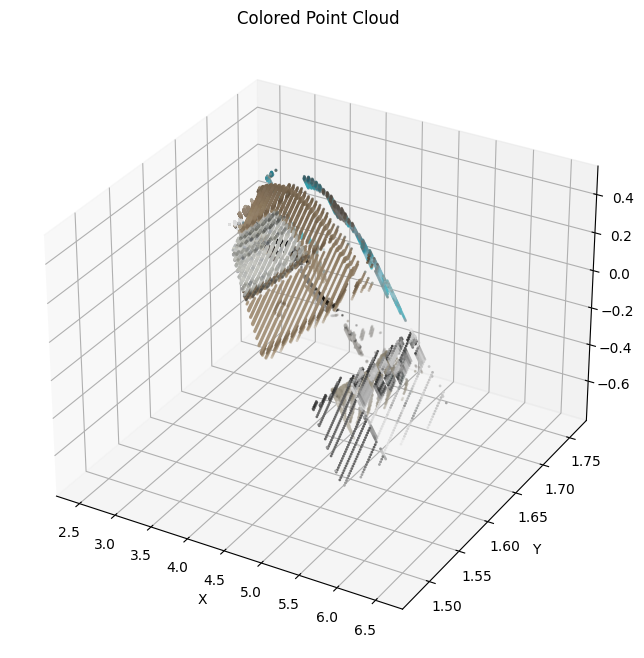

In [40]:
import matplotlib.pyplot as plt
import numpy as np

num_pts = 100_000
sampled_pc = pc.random_sample(num_pts)
print("sampled_pc.coords", type(sampled_pc.coords), sampled_pc.coords.shape)

# for k in sampled_pc:
#     print(k)
# print(vars(sampled_pc))
# print(sampled_pc.R.shape)
sampled_pc_dict = vars(sampled_pc)
print(type(sampled_pc_dict), sampled_pc_dict.keys())
points = sampled_pc_dict["coords"]
# print(sampled_pc["channels"]["R"].shape)
colors = np.stack([
    sampled_pc_dict["channels"]["R"][:, None], 
    sampled_pc_dict["channels"]["G"][:, None], 
    sampled_pc_dict["channels"]["B"][:, None]
], axis=-1)

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(
    points[:, 0], 
    points[:, 1], 
    points[:, 2], 
    s=1,
    c=colors,
)
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
plt.title("Colored Point Cloud")
plt.show()

<class 'numpy.ndarray'> <class 'dict'>
<class 'dict'> dict_keys(['coords', 'channels'])


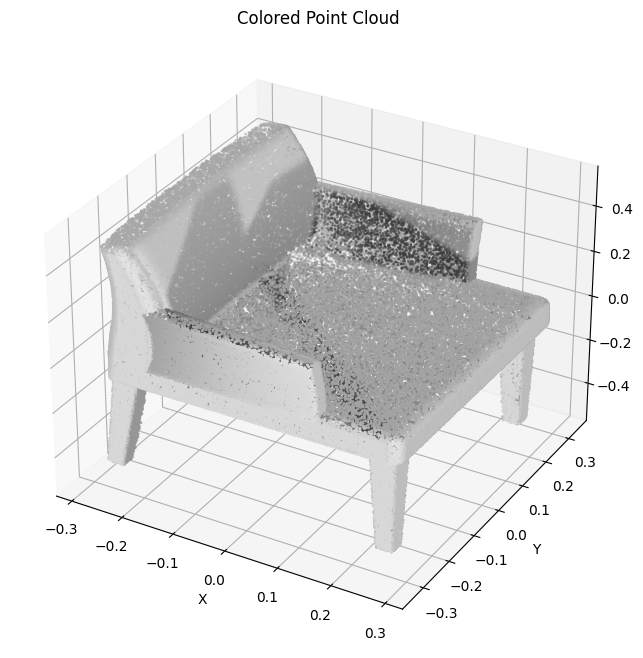

In [41]:
# Object data example
import sys
sys.path.append("/root/dev")
sys.path.append("/root/dev/ShapeNet_rendering/get_colored_pcs")
from ShapeNet_rendering.get_colored_pcs.view_data import BlenderViewData

data_path = "/root/data/shape-generation/shapenetv1/rendered_shapenet_uniform_light/03001627/aaba865e99c23e7082db9fca4b68095/rendered_images.zip"
vd_obj = BlenderViewData(data_path)

# coords = PointCloud.from_rgbd(vd_obj, 1)
# print(image_coords)
# print(image_mask, np.sum(image_mask)) # [False False False ... False False False] 74790
# print(image_mask_alpha, np.sum(image_mask_alpha)) # [False False False ... False False False] 73494
# print(camera_rays, camera_rays.shape) # (73494, 2, 3)
# print(depth_dirs, depth_dirs.shape) # [[-0.54642206  0.5171353  -0.6587822 ], ...] (73494, 3)
# print(ray_scales, ray_scales.shape) # (73494,)
# print(np.sum(ray_scales == 0.)) # 0
# print(coords, coords.shape) # point coords, (73494, 3)


pc = PointCloud.from_rgbd(vd_obj, 20)
print(type(pc.coords), type(pc.channels))
sampled_pc = pc.random_sample(100_000)
sampled_pc_dict = vars(sampled_pc)
print(type(sampled_pc_dict), sampled_pc_dict.keys())
points = sampled_pc_dict["coords"]
# print(sampled_pc["channels"]["R"].shape)
colors = np.stack([
    sampled_pc_dict["channels"]["R"][:, None], 
    sampled_pc_dict["channels"]["G"][:, None], 
    sampled_pc_dict["channels"]["B"][:, None]
], axis=-1)

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(
    points[:, 0], 
    points[:, 1], 
    points[:, 2], 
    s=1,
    c=colors,
)
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
plt.title("Colored Point Cloud")
plt.show()